In [2]:
# 필요 모듈 삽입


import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# data loading


# 데이터를 다운받아서 data 폴더 내 mnist 폴더에 압축 파일을 생성: gz 파일
# 예제로 제공되는 것이기에 가능: one hot encoding 작업된 것을 다운
# 두 개는 학습용, 두 개는 테스트용, x, y data 분리되어 있음
mnist = input_data.read_data_sets('C:/python_DA/data/mnist',one_hot = True)

Extracting C:/python_DA/data/mnist\train-images-idx3-ubyte.gz
Extracting C:/python_DA/data/mnist\train-labels-idx1-ubyte.gz
Extracting C:/python_DA/data/mnist\t10k-images-idx3-ubyte.gz
Extracting C:/python_DA/data/mnist\t10k-labels-idx1-ubyte.gz


In [4]:
# x data 확인
# 학습용 이미지 데이터


mnist.train.images
mnist.train.images.shape #(55000, 784)

train_x_data_df = pd.DataFrame(mnist.train.images)
train_x_data_df.to_csv('./mnist_x_data.csv', index=False)
# 만들어진 파일을 노트패드로 열어보면 숫자로 표현되어 잇음
# x데이터의 각 col은(각 픽셀값은) 0-1값으로 표현되어 있음
# 0-1 값은 희색-검정색 명암(색의 진하기 정도)을 의미
# 이는 이미 scale이 되어있는 상태


In [17]:
# y data 확인
# 학습용 이미지 데이터

mnist.train.labels
train_y_data_df = pd.DataFrame(mnist.train.images)
train_y_data_df.to_csv('./mnist_y_data.csv', index=False)
# 학습용 x데이터와 마찬가지로 파일로 저장해서 확인
# 확인해보면 one hot encoding이 완료된 데이터


In [12]:
# tensorflow machine learning


# palceholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# weight, bias
W = tf.Variable(tf.random_normal([784, 10]), name='weight')
b = tf.Variable(tf.random_normal([10]), name='bias')

# H
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


cost값: 13.613129615783691
cost값: 5.424129486083984
cost값: 3.461731195449829


In [16]:
# 학습
# 이제부터 학습시, 조심! 기존에 연습하던 것 보다 데이터 사이즈가 커졋기 때문!
# 기존에는 몇천번씩 학습을 시켰으나 이제는, 에폭을 이용!
# 데이터 사이즈를 보고 에폭을 결정

# 위에서 df으로 만든 데이터가 아닌 기존의 데이터 사용
# numpy array형태를 사용하는 것이 좋기 때문, 헷갈리지 않음
# batch size = 전체 데이터를 몇개로 나눌지, 일부를 가지고 반복 처리
# batch, epoch을 가지고 학습을 진행하도록!
# 원래는 다 코드를 짜야 됨, 단 예제이기에 tensorflow에서 함수 제공해줌
# mnist.train_next_batch(배치 사이즈)

train_epoch = 30
batch_size = 100


for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost],
                               feed_dict={X: batch_x,
                                          Y: batch_y})
    if step % 10 == 0:
        print(f'cost값: {cost_val}')


cost값: 0.6362048387527466
cost값: 0.44082024693489075
cost값: 0.3243570029735565


In [17]:
# 예측 전, 정확도 측정


predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'정확도:{sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels})}')

정확도:0.9187999963760376


숫자: 3
숫자: [3]
예측: [3]


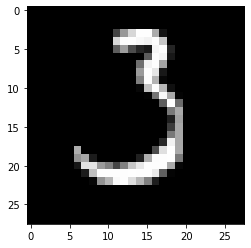

In [61]:
# prediction


# 랜덤으로 하나의 데이터를 추출해서 이를 가지고 prediction을 한 후 결과를 비교하시오
# 랜덤으로 몇번째 행을 난수 값으로 불러오는 것: 행번호
r = np.random.randint(0, mnist.test.num_examples)


# 난수가 의미하는 행의 실제label값을 먼저 구해보아요
# mnist.test.labels[r] : 어떤 수인지 one hot encoding으로 나타냄
sess.run(tf.argmax(mnist.test.labels[r]))
print(f'숫자: {sess.run(tf.argmax(mnist.test.labels[r]))}')
# 이때, mnist.test.labels[r]로 뽑아온 행은 1차원으로 나옴. 따라서 axis=1 설정하면 오류
# 설정 안하면 axis=0으로 default 잡힘, 혹은 axis=0으로 직접 설정해주면 됨
# 그리고 tf.argmax는 tf, 즉 node이기에 sess.run으로 실행시켜줘야 함

# axis 설정하려고 한다면 2차원으로 뽑아와야 됨: 구간을 설정해주면 됨
sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1))
print(f'숫자: {sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1))}')

# 예측해보기
sess.run(tf.argmax(H,1),
        feed_dict = {X: mnist.test.images[r:r+1]})
print(f'예측: {sess.run(tf.argmax(H,1),feed_dict = {X: mnist.test.images[r:r+1]})}')
             
# 우리 모델은 90퍼의 정확성을 가지기 때문에 10에 1은 잘못 예측한다.

# 숫자가 아닌 이미지로 불러오려고 한다.
# 값을 가져와서 28*28 픽셀 형태로 reshape
result = mnist.test.images[r:r+1].reshape(28,28)             
# plt.imshow( ) 함수 사용
plt.imshow(result, cmap='gray')


In [ ]:
# 이를 다 끝냈다면, kaggle에 가서 진행
# 데이터 불러오기부터 전처리, 배치 등 모두 다 진행해줘야 함
# 지금은 90%지만 앞으로 배우는 것들을 다 업뎃(딥러닝)하면서 99퍼센트로 만들 것